In [2]:
# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS:

In [3]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Part 1: Data Preparation and Exploration

In [5]:
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], dayfirst=True)
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [6]:
# Set the date column as the index:
df.set_index('date', inplace=True)

In [7]:
df.shape

(7588, 1)

In [8]:
# Summary Statistics:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ex_rate,7588.0,0.776974,0.13662,0.483297,0.701422,0.761377,0.873477,1.102536


In [9]:
# Checking for missing values:
# There are no missing values found.
df.isna().sum()

Ex_rate    0
dtype: int64

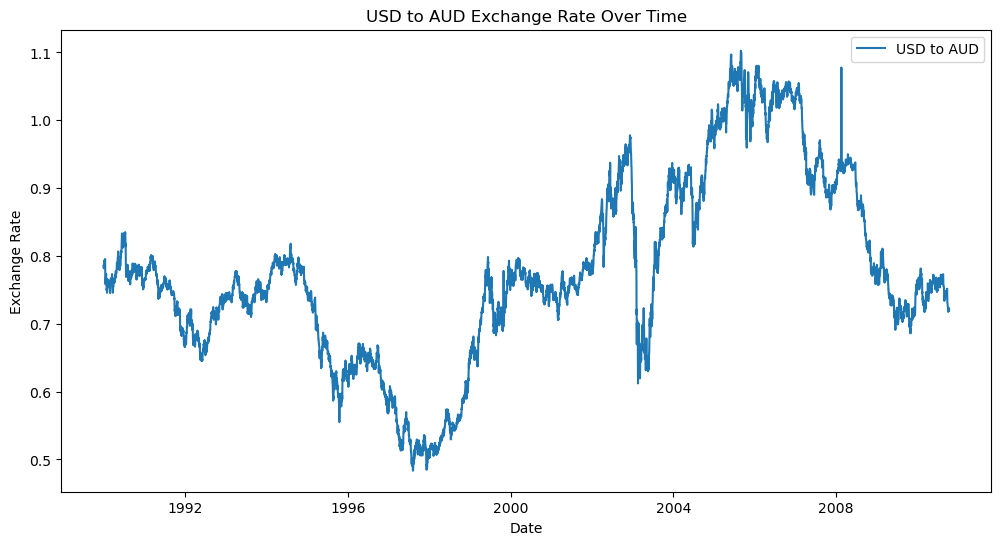

In [10]:
# Plot the time series for USD to Australian Dollar:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.legend()
plt.show()

In [11]:
# Part 2: Model Building - ARIMA

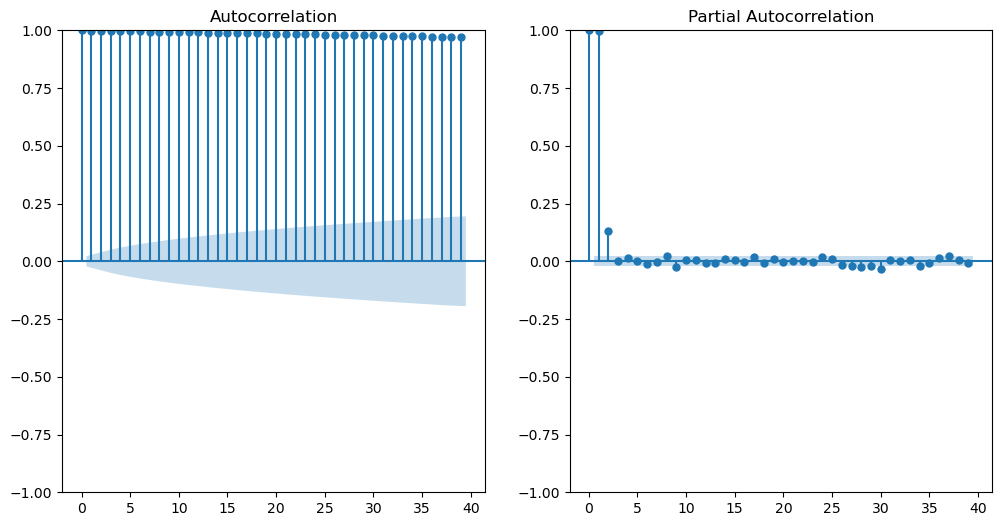

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate'], ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Ex_rate'], ax=plt.gca())
plt.show()

In [13]:
# ARIMA model:
# We take pdq as 1,2,3:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (adjust p, d, q as needed)
model = ARIMA(df['Ex_rate'], order=(1, 2, 3))  
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

D:\Coding\DS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Coding\DS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Coding\DS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 2, 3)   Log Likelihood               27829.487
Date:                Wed, 31 Jul 2024   AIC                         -55648.975
Time:                        18:38:23   BIC                         -55614.304
Sample:                    01-01-1990   HQIC                        -55637.076
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8756      0.032    -27.612      0.000      -0.938      -0.813
ma.L1         -0.1377      0.032     -4.343      0.000      -0.200      -0.076
ma.L2         -0.7485      0.034    -22.236      0.0

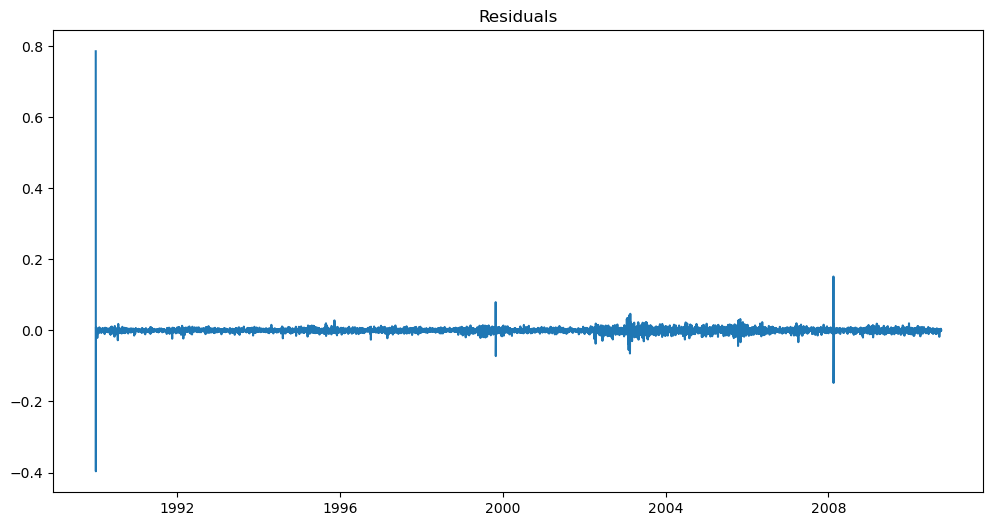

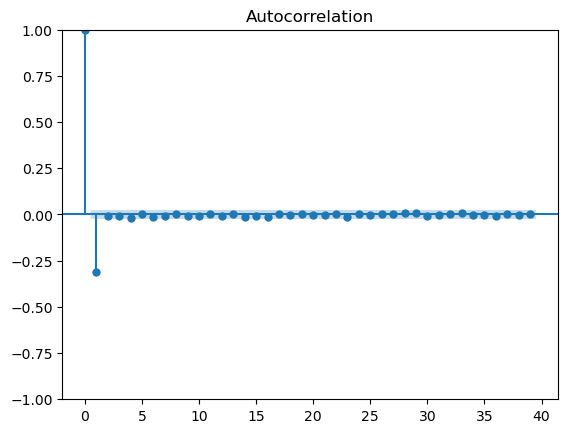

In [14]:
# Plotting  Residuals:
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF of residuals
plot_acf(residuals)
plt.show()

In [15]:
# Forecasting:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define the split point
split_date = '2008-12-31'
train = df[:split_date]
test = df[split_date:]

In [16]:
# Fit ARIMA model on training data
model = ARIMA(train['Ex_rate'], order=(1, 2, 3))
model_fit = model.fit()

# Forecast on the testing data
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates for plotting
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

D:\Coding\DS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Coding\DS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Coding\DS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


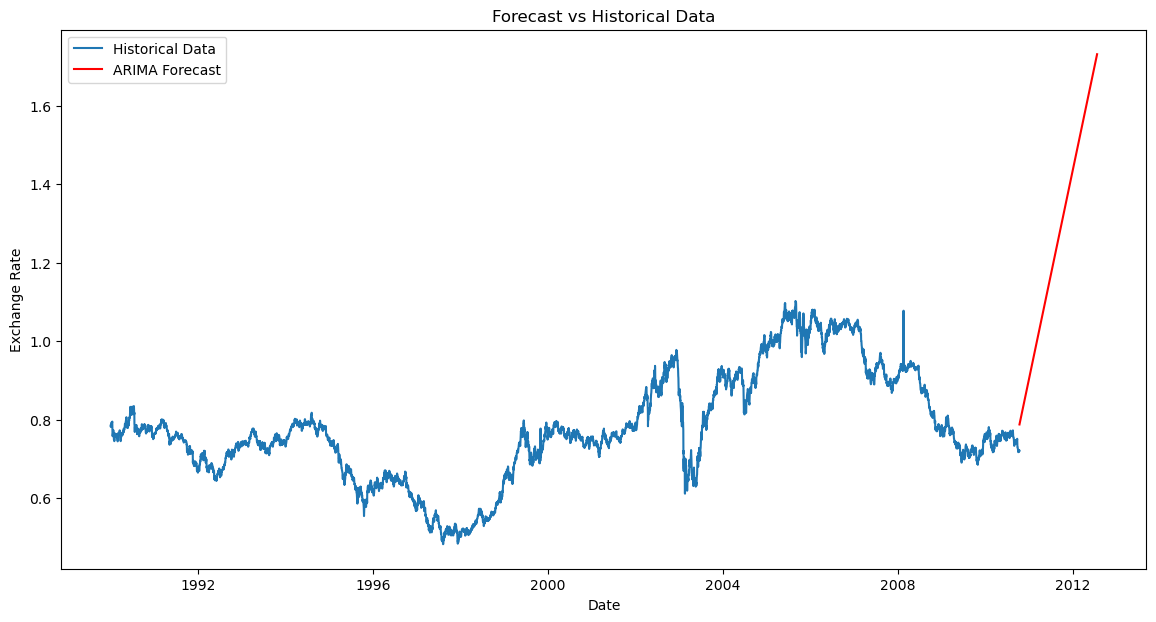

In [17]:
# Plot historical data and forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(future_dates, forecast, label='ARIMA Forecast', color='red')

plt.title('Forecast vs Historical Data')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [18]:
# Part 3: Model Building - Exponential Smoothing

In [19]:
# Model Selection and Parameter Optimization
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example using Holt-Winters' seasonal method
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit_es = model_es.fit()

# Print model summary
print(model_fit_es.summary())

D:\Coding\DS\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.611
Trend:                         Additive   BIC                         -77513.662
Seasonal:                      Additive   AICC                        -77624.520
Seasonal Periods:                    12   Date:                 Wed, 31 Jul 2024
Box-Cox:                          False   Time:                         18:38:26
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8700944                alpha                 True
smoothing_trend          

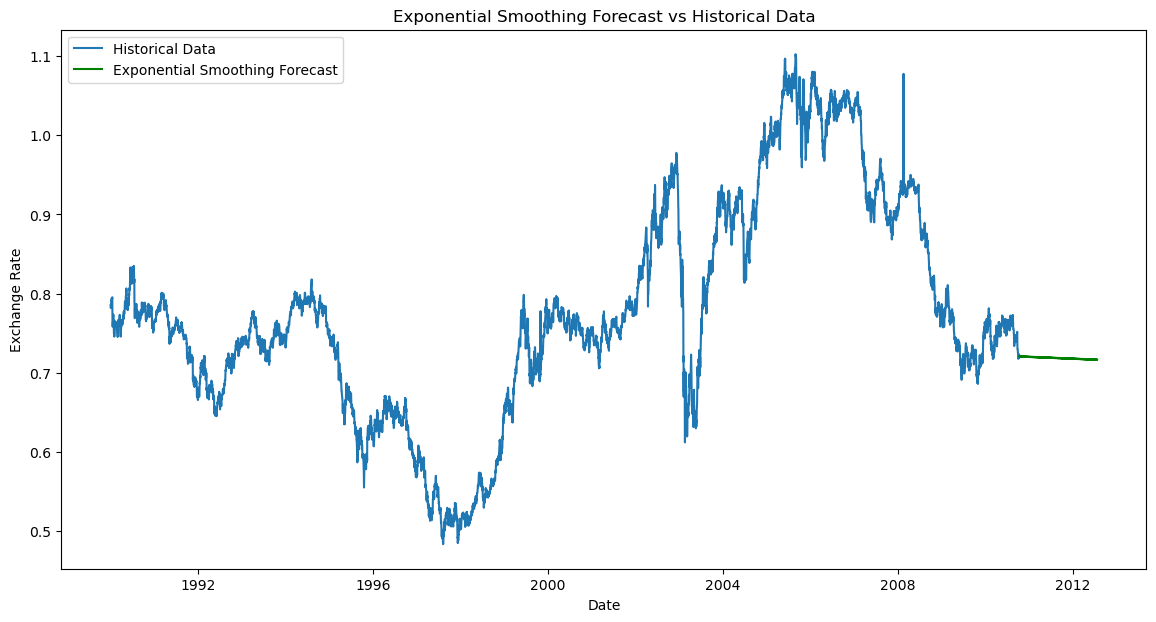

In [20]:
# Fit the model and forecast
forecast_es = model_fit_es.forecast(steps=forecast_steps)

# Plot historical data and forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(future_dates, forecast_es, label='Exponential Smoothing Forecast', color='green')

plt.title('Exponential Smoothing Forecast vs Historical Data')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [21]:
# Part 4: Evaluation and Comparison

In [22]:
# 1. Compute Error Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute error metrics for ARIMA
mae_arima = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast)
rmse_arima = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast, squared=False)

# Compute error metrics for Exponential Smoothing
mae_es = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast_es)
rmse_es = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast_es, squared=False)

print(f'ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}')
print(f'Exponential Smoothing MAE: {mae_es}, RMSE: {rmse_es}')

ARIMA MAE: 0.5164713446824603, RMSE: 0.5848633805467712
Exponential Smoothing MAE: 0.028887528674785005, RMSE: 0.035027078280918604


D:\Coding\DS\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Coding\DS\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
# Interpretation:

# MAE: Measures the average magnitude of the errors in a set of forecasts, without considering their direction. The lower the MAE, the better the model's 
# predictions. In this case, the Exponential Smoothing model has a much lower MAE than ARIMA, suggesting it makes more accurate predictions on average.

# RMSE: Measures the square root of the average squared differences between predicted and actual values. It penalizes larger errors more than MAE. The 
# lower RMSE for Exponential Smoothing indicates that the model's predictions are closer to the actual values, with fewer large errors.

In [24]:
# Conclusion:

# Exponential Smoothing Model: Clearly performs better with lower MAE and RMSE, indicating it provides more accurate forecasts and fits the historical data 
# better.

# ARIMA Model: While it also performs reasonably well, the higher MAE and RMSE suggest it might not capture the nuances of your data as effectively as the 
# Exponential Smoothing model.